In [2]:
from music21 import chord, note, pitch, stream, metadata, harmony

In [3]:
note.Note('A-').pitch.accidental

<music21.pitch.Accidental flat>

In [4]:
class ChordfromRoot:
    def __init__(self, chord_input: str):
        """
        Creates a chord based on the input string.

        Args:
        chord_input (str): The chord string (e.g., "B", "B-m", "C#maj7").
        """
        # Replace flat symbols "Bb" -> "B-""
        self.chord_input = chord_input.replace("b", "-")
        self.root_note, self.suffix = self.extract_root_and_suffix(self.chord_input)
        self.chordCreated = self.create_chord(self.root_note, self.suffix)

    def extract_root_and_suffix(self, chord_input: str):
        """
        Logic for extracting root and suffix
        """

        # Valid root notes (the 12 note names ['A', 'B-', 'B', 'C', 'C#', 'D', 'E-', 'E', 'F', 'F#', 'G', 'G#'])
        names_of_notes = [note.Note('A').transpose(n).name for n in range(12)]

        try:
            # Check for 2-character root notes (e.g. B-, C#)
            if chord_input[:2] in names_of_notes:
                root_note = chord_input[:2]
                suffix = chord_input[2:]  # Rest of the string after the root note
            # Check for 1-character root notes (e.g. B, C)
            elif chord_input[:1] in names_of_notes:
                root_note = chord_input[:1]
                suffix = chord_input[1:]  # Rest of the string after the root note
            else:
                raise ValueError(f"Invalid chord root in input: {chord_input}./nAccepted values:{names_of_notes}")
        except ValueError as e:
            print(e)
            root_note, suffix = None, None  # Default values for invalid input

        # Create music21 note object
        root_note = note.Note(root_note)

        return root_note, suffix

    def create_chord(self, root_note, suffix) -> chord.Chord:
        """
        Creates a chord based on the input strings using a dictionary of chord intervals.
        Supports major, minor, diminished, augmented, and seventh chords.

        Returns:
        music21.chord.Chord: A music21 chord object representing the requested chord.
        """
        # Dictionary mapping chord types to their intervals
        CHORD_INTERVALS = {
            "maj": [0, 4, 7],          # Major chord
            "m": [0, 3, 7],            # Minor chord
            "dim": [0, 3, 6],          # Diminished chord
            "aug": [0, 4, 8],          # Augmented chord
            "maj7": [0, 4, 7, 11],     # Major seventh chord
            "m7": [0, 3, 7, 10],       # Minor seventh chord
            "7": [0, 4, 7, 10],        # Dominant seventh chord
            "dim7": [0, 3, 6, 9],      # Diminished seventh chord
            "m7b5": [0, 3, 6, 10],     # Half-diminished seventh chord (minor 7 flat 5)
        }

        # Default to major chord if no valid suffix is found
        intervals = CHORD_INTERVALS.get(suffix, CHORD_INTERVALS["maj"])

        # Generate the chord pitches based on the root and intervals
        chord_pitches = [root_note.transpose(interval) for interval in intervals]

        # Create and return the music21 chord object
        return chord.Chord(chord_pitches)

    def transpose(self, interval: int):
        # Transpose logic
        pass

In [5]:
# Usage
chord1 = ChordfromRoot("Am7")
chord1.chordCreated

<music21.chord.Chord A C E G>

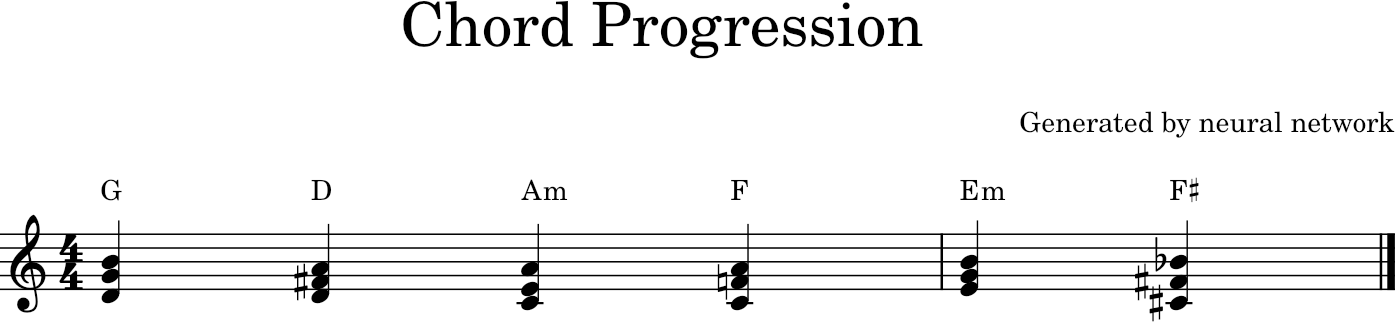

In [6]:
# Example song
song = ['G', 'D', 'Am', 'F', 'Em', 'F#']
song_stream = stream.Stream()

# Add metadata to the stream for clarity (optional)
song_stream.metadata = metadata.Metadata()
song_stream.metadata.title = "Chord Progression"
song_stream.metadata.composer = "Generated by neural network"

# Add chords and their names
for chord_input in song:
    chord_created = ChordfromRoot(chord_input).chordCreated
    # Add a ChordSymbol for the chord name
    chord_symbol = harmony.ChordSymbol(chord_input)
    song_stream.append(chord_symbol)
    song_stream.append(chord_created)

# Show the stream
song_stream.show()

In [7]:
song_stream.show("midi")

In [9]:
import os

# Example song
song = ['D7', 'G7', 'C7', 'F7',]
song_stream = stream.Stream()

# Add metadata to the stream for clarity (optional)
# song_stream.metadata = metadata.Metadata()
# song_stream.metadata.title = "Chord Progression"
# song_stream.metadata.composer = "Generated by neural network"

# Add chords and their names
for chord_input in song:
    chord_created = ChordfromRoot(chord_input).chordCreated
    # Add a ChordSymbol for the chord name
    chord_symbol = harmony.ChordSymbol(chord_input)
    song_stream.append(chord_symbol)
    song_stream.append(chord_created)

midi_path = os.path.join(os.getcwd(), "output.midi")
song_stream.write('midi', fp=midi_path)
print(f"MIDI file saved at: {midi_path}")

MIDI file saved at: /home/sam/Documents/code/chords-progression-prediction/notebooks/output.midi
